In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Average (Mean) ##

In [2]:
values = make_array(2, 3, 3, 9)

In [3]:
sum(values)/len(values)

4.25

In [4]:
np.average(values)

4.25

In [5]:
np.mean(values)

4.25

In [6]:
(2 + 3 + 3 + 9)/4

4.25

In [7]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [8]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


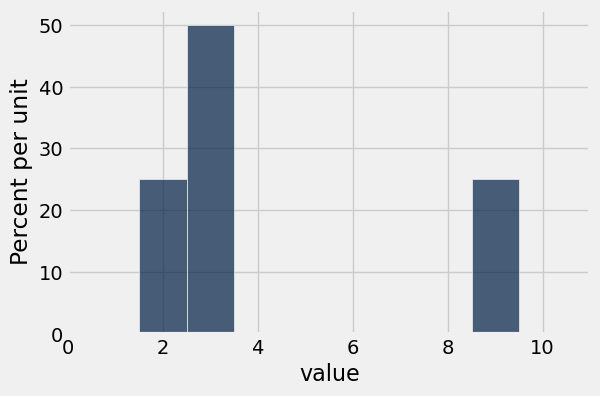

In [9]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist('value', bins = bins_for_display)

In [10]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

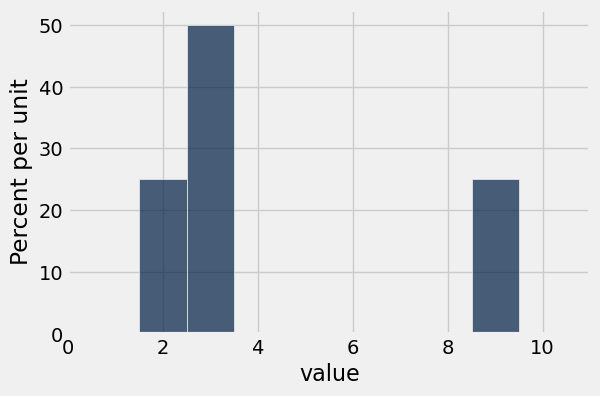

In [11]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [12]:
np.average(values) # small array average

4.25

In [13]:
np.average(new_vals) # big array average

4.25

In [14]:
np.median(new_vals) # median of big array

3.0

In [15]:
np.median(values)

3.0

## Standard Deviation ##

In [16]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [17]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [18]:
deviations = values - average_value # find individual distances from average 4.25
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [19]:
sum(deviations) # negative and positive distances cancel each other out

# we need to "normalize" our deviations so they don't cancel each other out

0.0

In [20]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [21]:
# Variance of the data, take average of squared deviations

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [22]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [23]:
np.std(values)
# what does 2.77 mean, in terms of our data set?

# one standard deviation away from the average of 4.25 is 2.77
# i can notice within one standard deviation plus or minus away from the average
# covers 75% of my data set

# 2 standard deviations away from the average, plus or minus, covers 100% of my data

2.7726341266023544

## Chebyshev's Bound

In [24]:
births = Table.read_table('data/baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

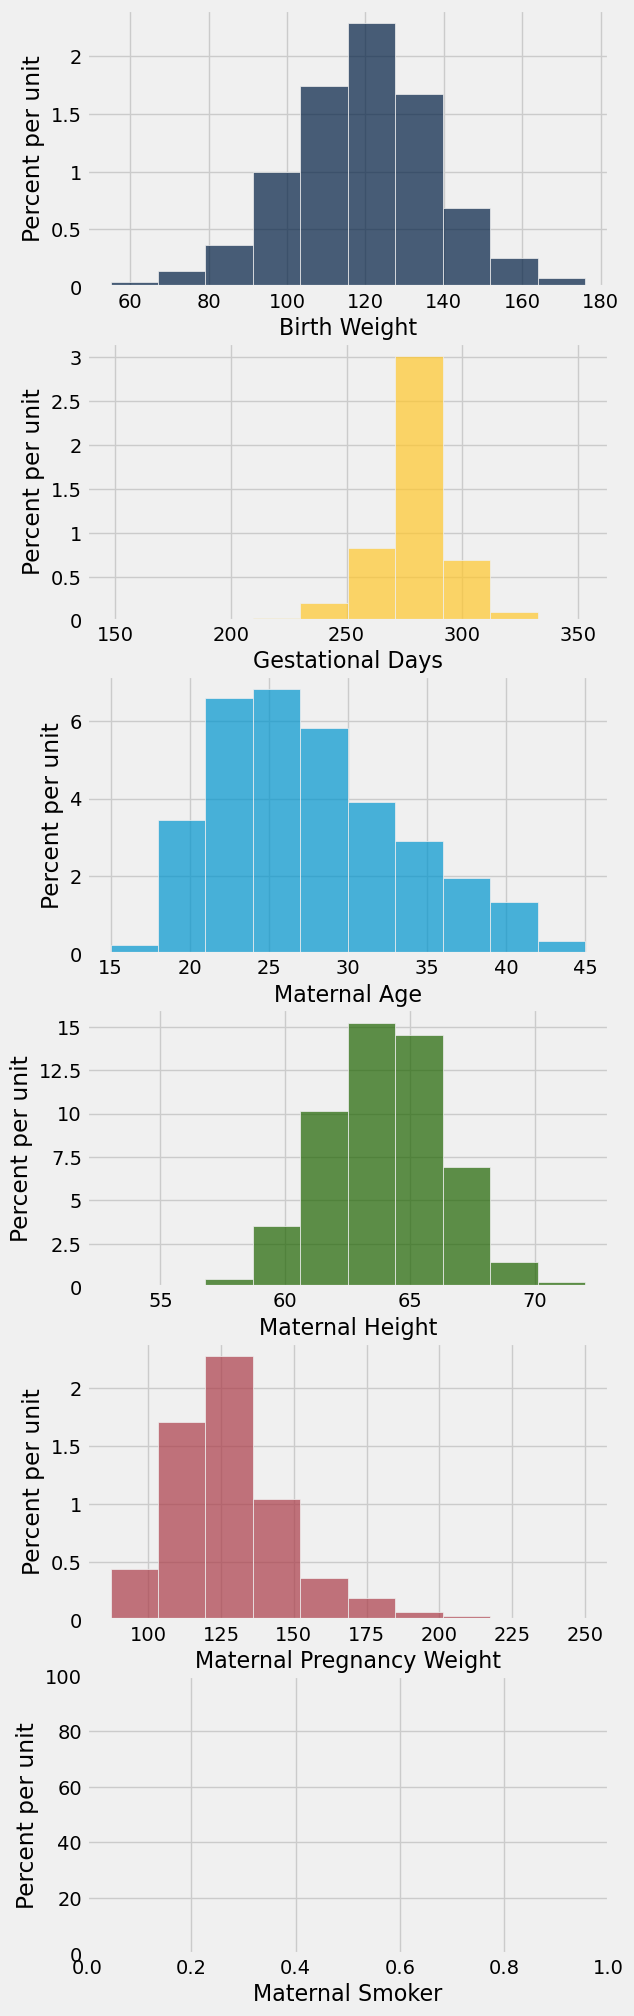

In [25]:
births.hist(overlay = False)

In [39]:
median = np.median(mpw)
median

min(mpw)

87

In [30]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(mean-2*sd, mean+2*sd)
# what does std of 20.72 mean, in terms of our average and compared to the rest of our 
# data?

# bonus: is it consistent with chebyshev's bounds?



(87.027805872529484, 169.92960468965111)

In [34]:
within_2_SDs = births.where('Maternal Pregnancy Weight', are.between(mean - 2*sd, mean + 2*sd))
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [36]:
# Proportion within 3 SDs of the mean
(within_2_SDs.num_rows / births.num_rows, within_3_SDs.num_rows / births.num_rows)
# 2SDs covers 95%
#3SDs 98.64% of my data

# 95% of moms in our sample were between 87lbs and 169.93 lbs

(0.9505962521294719, 0.9863713798977853)

In [37]:
# Chebyshev's bound: 
# The proportion we calculated above should be at least

1 - 1/(3**2)

0.8888888888888888

In [38]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

In [40]:
# See if Chebyshev's bounds work for distributions with various shapes

for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')


Birth Weight
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.57 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Gestational Days
Average plus or minus 2 SDs: 93.78 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs: 99.57 % of the data
Average plus or minus 5 SDs: 99.83 % of the data

Maternal Age
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.91 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Height
Average plus or minus 2 SDs: 97.19 % of the data
Average plus or minus 3 SDs: 99.66 % of the data
Average plus or minus 4 SDs: 99.91 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs:

In [ ]:
# the data above
# tells us the variance from the average values
# how much difference/variance there is in terms of maternal weight, baby's birth weight
# and so on

# how similar values are

## Standard Units ##

In [41]:
def standard_units(x):
    """Convert array x to standard units."""
    # z = value - average / SD (according to slides)
    return (x - np.mean(x)) / np.std(x)

In [47]:
ages = births.column('Maternal Age')
ages
np.std(ages)

5.8153604041908968

In [43]:
ages_standard_units = standard_units(ages)

In [44]:
np.mean(ages_standard_units), np.std(ages_standard_units)

# what do the numbers below mean, in words?
#0.000000000000000078 ~0 = average (age in standard units)
# 1.0 = SD (age in standard units)


(-7.868020072300939e-17, 1.0)

In [45]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [50]:
np.mean(ages), np.std(ages), np.median(ages)

(27.228279386712096, 5.8153604041908968, 26.0)

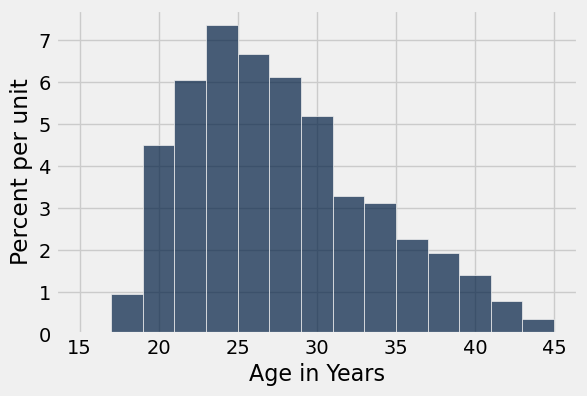

In [49]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

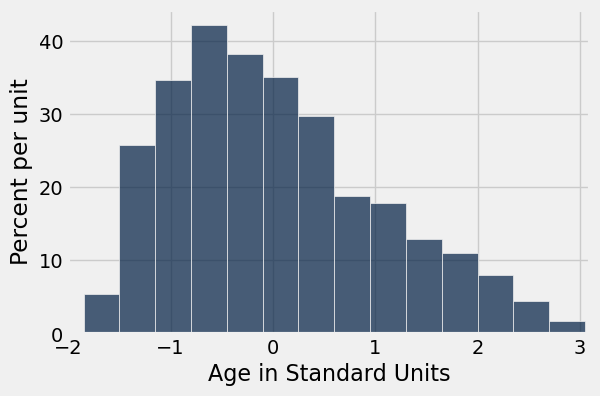

In [51]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

## The SD and Bell Shaped Curves

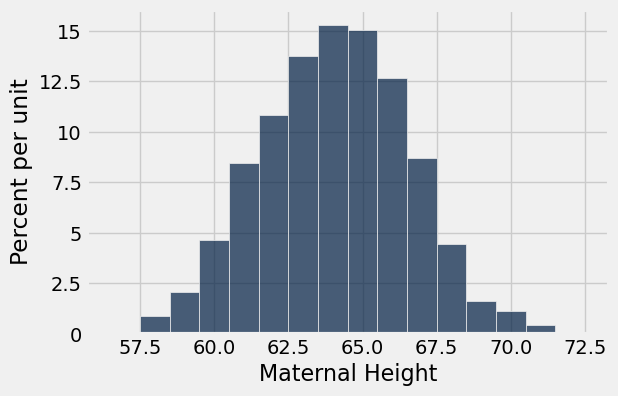

In [52]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [53]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.049403747870528, 2.5250254409674375)

In [55]:
np.mean(heights) - np.std(heights), np.mean(heights) + np.std(heights)

(61.524378306903088, 66.574429188837968)